In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#df = pd.read_json('trades.json')
#df = pd.read_json('bfxbook.json')
df = pd.read_json('bfxtrades.json')

In [3]:
df.head()

,_id,_index,_score,_source,_type
0,4ju0nWMBIJAPixw5-b5f,bitfinextradesbtc,1,"{'price': 7550.1, 'timestamp': 1527359273151, ...",doc
1,5Du0nWMBIJAPixw5-b5i,bitfinextradesbtc,1,"{'price': 7550.1, 'timestamp': 1527359273155, ...",doc
2,3zuwnWMBIJAPixw53JnO,bitfinextradesbtc,1,"{'price': 7552.6, 'timestamp': 1527359003757, ...",doc
3,iDuxnWMBIJAPixw5xKMf,bitfinextradesbtc,1,"{'price': 7550.1, 'timestamp': 1527359062460, ...",doc
4,Ezu0nWMBIJAPixw5E7UH,bitfinextradesbtc,1,"{'price': 7550.1, 'timestamp': 1527359213318, ...",doc


In [4]:
data = pd.DataFrame()
for k in df._source[0].keys():
    data[k]=[d[k] for d in df._source]
df = data
df.head()

,price,timestamp,localtime,tid,amount
0,7550.1,1527359273151,1527359273310,250284772,0.002100
1,7550.1,1527359273155,1527359273314,250284774,0.873098
2,7552.6,1527359003757,1527359003853,250284348,-0.138557
3,7550.1,1527359062460,1527359063070,250284450,0.008881
4,7550.1,1527359213318,1527359214342,250284698,0.145264


In [5]:
df['p'] = (df.price*100).astype(int)/100.0

In [6]:
# convert timestamp to actual time
import datetime
s=df.timestamp[0]
datetime.datetime.fromtimestamp(s/1000.0).strftime('%Y-%m-%d %H:%M:%S.%f')
df['t'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000.0).strftime('%M:%S.%f')) #%Y-%m-%d %H:

In [7]:
df.head()

,price,timestamp,localtime,tid,amount,p,t
0,7550.1,1527359273151,1527359273310,250284772,0.002100,7550.1,27:53.151000
1,7550.1,1527359273155,1527359273314,250284774,0.873098,7550.1,27:53.155000
2,7552.6,1527359003757,1527359003853,250284348,-0.138557,7552.6,23:23.757000
3,7550.1,1527359062460,1527359063070,250284450,0.008881,7550.1,24:22.460000
4,7550.1,1527359213318,1527359214342,250284698,0.145264,7550.1,26:53.318000


In [8]:
len(df.tid), len(set(df.tid))

(688, 688)

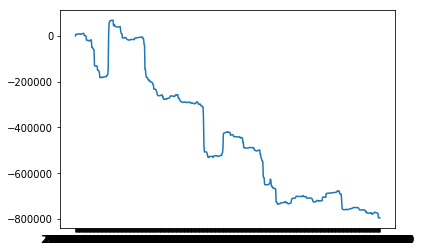

In [9]:
import numpy as np
#plt.plot(df.t, np.cumsum(df.amount*df.price)) #doesn't really mean anything ;)

In [10]:
sta = int(df.price.min()*100)
sto = int(df.price.max()*100)
stepSize=0.1

priceBins = range(sta, sto, int(stepSize*100))

spec = np.zeros((len(priceBins),len(df.timestamp)))

for i, pbin in enumerate(priceBins):
    pbin/=100.0
    ix = ((df.price>=pbin) & (df.price<(pbin+stepSize)))
    spec[i,:]=np.cumsum(df.amount*ix)

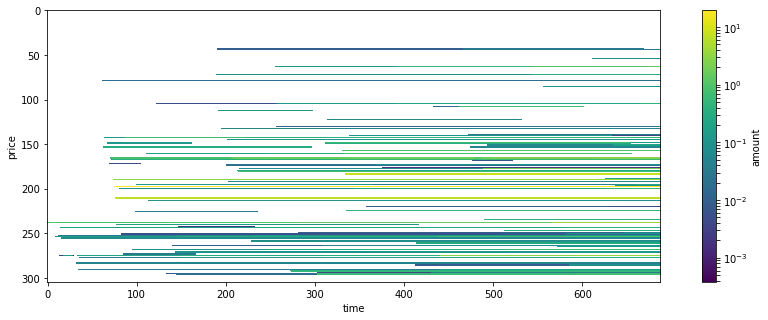

In [12]:
%matplotlib inline
plt.figure(figsize=(15,5))
from matplotlib.colors import LogNorm
plt.imshow(spec[:,:], norm=LogNorm() )# cmap='jet'
plt.xlabel('time')
plt.ylabel('price')
cb = plt.colorbar()
cb.set_label('amount')
plt.show()

In [39]:
counts = pd.value_counts(pd.cut(df.price, bins=price_bins))

In [96]:
t_idx=pd.cut(df.timestamp, bins=time_bins)

(array([  15.,   39.,  103.,   76.,   72.,  101.,   69.,   84.,   79.,   50.]),
 array([ 7526.3 ,  7529.35,  7532.4 ,  7535.45,  7538.5 ,  7541.55,
         7544.6 ,  7547.65,  7550.7 ,  7553.75,  7556.8 ]),
 <a list of 10 Patch objects>)

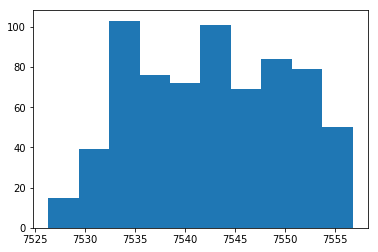

In [28]:
plt.hist(data.price)

In [ ]:
# assuming your "timestamp" column is labeled ts: 
df['hod'] = [r. for r in df.timestamp]

# now you can calculate stats for each bin
ave = df[ (df.hod>=0) & (df.hod<6) ].mean()

In [113]:
df.timestamp.iloc[0].min

Timestamp('1677-09-21 00:12:43.145225')

# get the data from ElasticSearch-Server
--> wasn't working

In [1]:
from elasticsearch import Elasticsearch

txt = ''
with open('elasticpw.txt') as f:
    for line in f.readlines():
        txt+=line
    txt = txt.replace('\n','')

# you can use RFC-1738 to specify the url
es = Elasticsearch([txt])

In [1]:
import json

msg = [248307586, 1527023078373, -0.45705041, 8091.1]
doc = {
    "tid": msg[0],
    "timestamp": msg[1],
    "amount": msg[2],
    "price": msg[3]
}

res = es.get(index="bitfinextradesbtc", doc_type='doc', id=250)

NameError: name 'd' is not defined

In [ ]:
#res = es.search(index="index", body={"query": {"match_all": {}}}) #TODO

# Ignore other methods that have been tried ;)

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
price_bins = np.linspace(df.price.min(), df.price.max(), 10)
time_bins = pd.date_range(start=min(df.timestamp), end=max(df.timestamp), freq='1s')

H, xedges, yedges = np.histogram2d(df.price, df.t, bins=(price_bins, time_bins))
H = H.T  # Let each row list bins with common y range.
plt.imshow(H)

ValueError: could not convert string to float: '00:03.222000'